In [221]:
#etherum fraud detection
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import  accuracy_score,classification_report, confusion_matrix ,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [222]:
dataset = pd.read_csv("ether_transaction_dataset.csv",sep=",")
dataset.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [223]:
dataset.tail()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
9836,9836,2175,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,12635.10,631.39,58748.48,4,13,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,9837,2176,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.00,0.00,0.00,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,9838,2177,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2499.44,2189.29,261601.88,67,43,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,9839,2178,0xffde23396d57e10abf58bd929bb1e856c7718218,1,0.00,0.00,0.00,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9840,9840,2179,0xd624d046edbdef805c5e4140dce5fb5ec1b39a3c,1,37242.70,149.56,670817.33,18,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,,INS Promo1


In [224]:
#select the columns as IV’s and replace the spaces in column names
dataset = dataset.iloc[:,2:]
dataset.columns = dataset.columns.str.replace(' ', '')
dataset.head()

,Address,FLAG,Avgminbetweensenttnx,Avgminbetweenreceivedtnx,TimeDiffbetweenfirstandlast(Mins),Senttnx,ReceivedTnx,NumberofCreatedContracts,UniqueReceivedFromAddresses,UniqueSentToAddresses,...,ERC20minvalsent,ERC20maxvalsent,ERC20avgvalsent,ERC20minvalsentcontract,ERC20maxvalsentcontract,ERC20avgvalsentcontract,ERC20uniqsenttokenname,ERC20uniqrectokenname,ERC20mostsenttokentype,ERC20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [225]:
#checking if we can group
from collections import Counter
len(Counter(dataset.Address))
def counts (data):
    counts = Counter(data)
    print(counts)
    print("length",len(counts))
    
#counts(dataset.Address)
#counts(dataset.ERC20_most_rec_token_type)
#counts(dataset.ERC20mostsenttokentype)

d =dataset.groupby(dataset.ERC20mostsenttokentype).mean()
d.head()

,FLAG,Avgminbetweensenttnx,Avgminbetweenreceivedtnx,TimeDiffbetweenfirstandlast(Mins),Senttnx,ReceivedTnx,NumberofCreatedContracts,UniqueReceivedFromAddresses,UniqueSentToAddresses,minvaluereceived,...,ERC20maxvalrec,ERC20avgvalrec,ERC20minvalsent,ERC20maxvalsent,ERC20avgvalsent,ERC20minvalsentcontract,ERC20maxvalsentcontract,ERC20avgvalsentcontract,ERC20uniqsenttokenname,ERC20uniqrectokenname
ERC20mostsenttokentype,,,,,,,,,,,,,,,,,,,,,
,0.0,2133.128571,3810.957143,6.188482e+05,349.857143,1436.142857,0.142857,138.142857,41.000000,0.059068,...,1.204827e+06,21500.596429,4.300000e-02,1.772488e+06,8.250388e+04,0.0,0.0,0.0,13.714286,26.571429
,1.0,4561.208984,1541.202393,5.641052e+04,3.833753,27.218304,0.022670,14.207389,2.674223,51.606507,...,1.315319e+06,657880.308097,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.019312
$7RIP$,0.0,7777.280000,4139.900000,1.479095e+06,146.000000,83.000000,2.000000,20.000000,49.000000,0.000096,...,3.650000e+02,35.557018,0.000000e+00,1.079999e+00,9.073700e-02,0.0,0.0,0.0,5.000000,12.000000
'',1.0,1315.410000,17.330000,1.976578e+04,15.000000,2.000000,3.000000,2.000000,4.000000,0.800000,...,4.520050e-01,0.452005,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,1.000000,1.000000
0,0.0,1933.012055,8487.824201,1.047912e+05,48.057513,47.613094,0.753126,9.382587,9.322346,80.925241,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000


Understanding the Data & exploration

In [226]:
dataset.shape

(9841, 49)

In [227]:
dataset.columns

Index(['Address', 'FLAG', 'Avgminbetweensenttnx', 'Avgminbetweenreceivedtnx',
       'TimeDiffbetweenfirstandlast(Mins)', 'Senttnx', 'ReceivedTnx',
       'NumberofCreatedContracts', 'UniqueReceivedFromAddresses',
       'UniqueSentToAddresses', 'minvaluereceived', 'maxvaluereceived',
       'avgvalreceived', 'minvalsent', 'maxvalsent', 'avgvalsent',
       'minvaluesenttocontract', 'maxvalsenttocontract',
       'avgvaluesenttocontract',
       'totaltransactions(includingtnxtocreatecontract', 'totalEthersent',
       'totaletherreceived', 'totalethersentcontracts', 'totaletherbalance',
       'TotalERC20tnxs', 'ERC20totalEtherreceived', 'ERC20totalethersent',
       'ERC20totalEthersentcontract', 'ERC20uniqsentaddr', 'ERC20uniqrecaddr',
       'ERC20uniqsentaddr.1', 'ERC20uniqreccontractaddr',
       'ERC20avgtimebetweensenttnx', 'ERC20avgtimebetweenrectnx',
       'ERC20avgtimebetweenrec2tnx', 'ERC20avgtimebetweencontracttnx',
       'ERC20minvalrec', 'ERC20maxvalrec', 'ERC20avgvalr

In [228]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 49 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Address                                         9841 non-null   object 
 1   FLAG                                            9841 non-null   int64  
 2   Avgminbetweensenttnx                            9841 non-null   float64
 3   Avgminbetweenreceivedtnx                        9841 non-null   float64
 4   TimeDiffbetweenfirstandlast(Mins)               9841 non-null   float64
 5   Senttnx                                         9841 non-null   int64  
 6   ReceivedTnx                                     9841 non-null   int64  
 7   NumberofCreatedContracts                        9841 non-null   int64  
 8   UniqueReceivedFromAddresses                     9841 non-null   int64  
 9   UniqueSentToAddresses                    

In [229]:
dataset.describe()

,FLAG,Avgminbetweensenttnx,Avgminbetweenreceivedtnx,TimeDiffbetweenfirstandlast(Mins),Senttnx,ReceivedTnx,NumberofCreatedContracts,UniqueReceivedFromAddresses,UniqueSentToAddresses,minvaluereceived,...,ERC20maxvalrec,ERC20avgvalrec,ERC20minvalsent,ERC20maxvalsent,ERC20avgvalsent,ERC20minvalsentcontract,ERC20maxvalsentcontract,ERC20avgvalsentcontract,ERC20uniqsenttokenname,ERC20uniqrectokenname
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [230]:
# check number unique value in each columns
dataset.nunique(axis=0)

Address                                           9816
FLAG                                                 2
Avgminbetweensenttnx                              5013
Avgminbetweenreceivedtnx                          6223
TimeDiffbetweenfirstandlast(Mins)                 7810
Senttnx                                            641
ReceivedTnx                                        727
NumberofCreatedContracts                            20
UniqueReceivedFromAddresses                        256
UniqueSentToAddresses                              258
minvaluereceived                                  4589
maxvaluereceived                                  6302
avgvalreceived                                    6767
minvalsent                                        4719
maxvalsent                                        6647
avgvalsent                                        5854
minvaluesenttocontract                               3
maxvalsenttocontract                                 4
avgvaluese

In [231]:
# Turn object variables into 'category' dtype for more computation efficiency
categories = dataset.select_dtypes('O').columns.astype('category')
dataset[categories]

# Inspect categoricals
for i in dataset[categories].columns:
    print(f'The categorical column --{i}-- has --{len(dataset[i].value_counts())}-- unique values')

The categorical column --Address-- has --9816-- unique values
The categorical column --ERC20mostsenttokentype-- has --305-- unique values
The categorical column --ERC20_most_rec_token_type-- has --467-- unique values


In [232]:
# Inspect numericals
numericals = dataset.select_dtypes(include=['float','int']).columns
dataset[numericals].describe()

,FLAG,Avgminbetweensenttnx,Avgminbetweenreceivedtnx,TimeDiffbetweenfirstandlast(Mins),Senttnx,ReceivedTnx,NumberofCreatedContracts,UniqueReceivedFromAddresses,UniqueSentToAddresses,minvaluereceived,...,ERC20maxvalrec,ERC20avgvalrec,ERC20minvalsent,ERC20maxvalsent,ERC20avgvalsent,ERC20minvalsentcontract,ERC20maxvalsentcontract,ERC20avgvalsentcontract,ERC20uniqsenttokenname,ERC20uniqrectokenname
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


0    7662
1    2179
Name: FLAG, dtype: int64


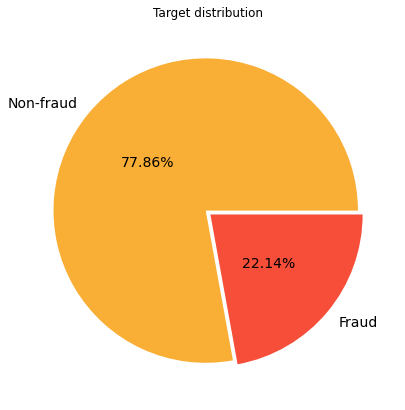

In [233]:
# Inspect target distribution
print(dataset['FLAG'].value_counts())

pie, ax = plt.subplots(figsize=[10,7])
labels = ['Non-fraud', 'Fraud']
colors = ['#f9ae35', '#f64e38']
plt.pie(x = dataset['FLAG'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Target distribution')
plt.show()

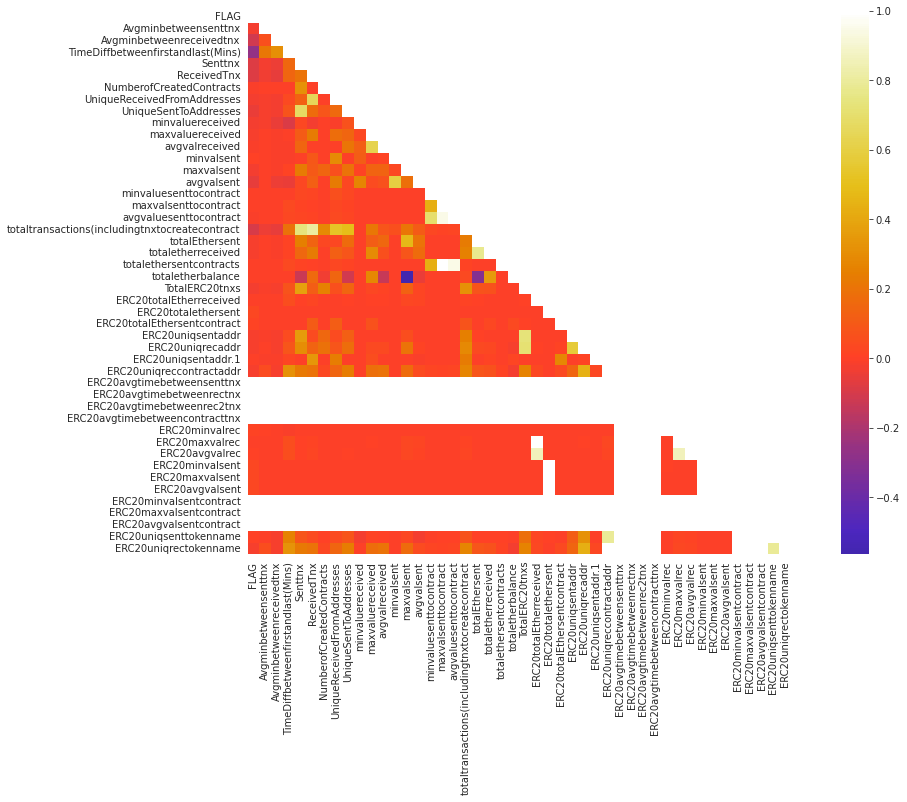

In [234]:
# Correlation matrix
corr = dataset.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, square=True)

In [235]:
X = d.iloc[:,1:]
X.isna().any()
#found no missing values
y =  d["FLAG"]
y = np.round(y).astype(int)



Data Cleaning

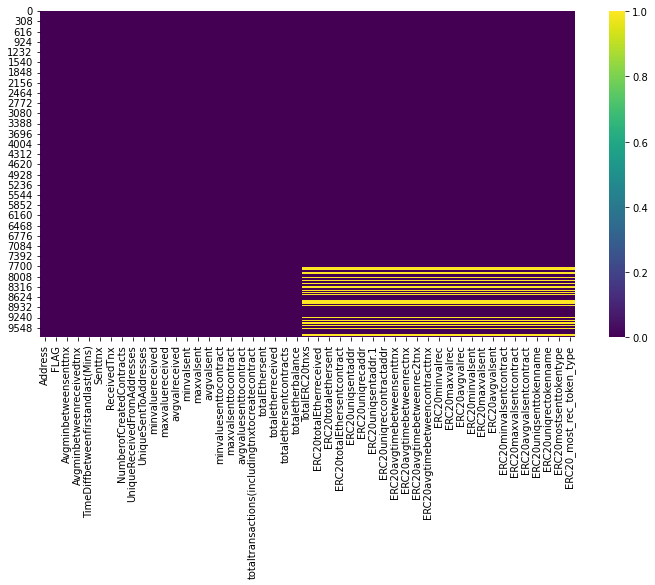

In [202]:
# Visualize missings pattern of the dataframe
plt.figure(figsize=(12,6))
sns.heatmap(dataset.isnull(), cmap='viridis',cbar=True)
plt.show()

In [203]:
# Drop the two categorical features
dataset.drop(dataset[categories], axis=1, inplace=True)

In [204]:
# Replace missings of numerical variables with median
dataset.fillna(dataset.median(), inplace=True)

(9841, 46)


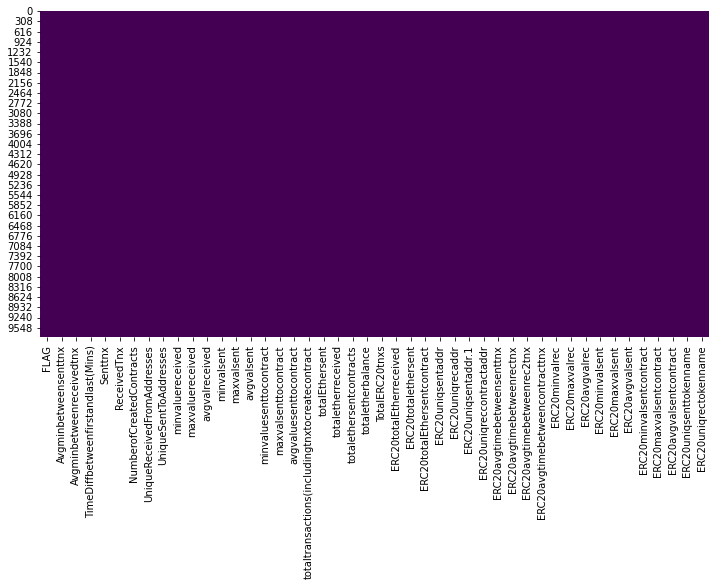

In [205]:
# Visualize missings pattern of the dataframe
print(dataset.shape)
plt.figure(figsize=(12,6))
sns.heatmap(dataset.isnull(), cmap='viridis',cbar=False)
plt.show()

In [206]:
# Filtering the features with 0 variance
no_var = dataset.var() == 0
print(dataset.var()[no_var])
print('\n')

# Drop features with 0 variance --- these features will not help in the performance of the model
dataset.drop(dataset.var()[no_var].index, axis = 1, inplace = True)
print(dataset.var())
print(dataset.shape)

ERC20avgtimebetweensenttnx        0.0
ERC20avgtimebetweenrectnx         0.0
ERC20avgtimebetweenrec2tnx        0.0
ERC20avgtimebetweencontracttnx    0.0
ERC20minvalsentcontract           0.0
ERC20maxvalsentcontract           0.0
ERC20avgvalsentcontract           0.0
dtype: float64


FLAG                                              1.724110e-01
Avgminbetweensenttnx                              4.616718e+08
Avgminbetweenreceivedtnx                          5.327656e+08
TimeDiffbetweenfirstandlast(Mins)                 1.042889e+11
Senttnx                                           5.733918e+05
ReceivedTnx                                       8.851734e+05
NumberofCreatedContracts                          2.000685e+04
UniqueReceivedFromAddresses                       8.917457e+04
UniqueSentToAddresses                             6.960121e+04
minvaluereceived                                  1.062298e+05
maxvaluereceived                                  1.692294e+08
avgvalreceived          

In [216]:
columns = dataset.columns
columns

Index(['FLAG', 'Avgminbetweensenttnx', 'Avgminbetweenreceivedtnx',
       'TimeDiffbetweenfirstandlast(Mins)', 'Senttnx', 'ReceivedTnx',
       'NumberofCreatedContracts', 'UniqueReceivedFromAddresses',
       'UniqueSentToAddresses', 'minvaluereceived', 'maxvaluereceived',
       'avgvalreceived', 'minvalsent', 'maxvalsent', 'avgvalsent',
       'minvaluesenttocontract', 'maxvalsenttocontract',
       'avgvaluesenttocontract',
       'totaltransactions(includingtnxtocreatecontract', 'totalEthersent',
       'totaletherreceived', 'totalethersentcontracts', 'totaletherbalance',
       'TotalERC20tnxs', 'ERC20totalEtherreceived', 'ERC20totalethersent',
       'ERC20totalEthersentcontract', 'ERC20uniqsentaddr', 'ERC20uniqrecaddr',
       'ERC20uniqsentaddr.1', 'ERC20uniqreccontractaddr', 'ERC20minvalrec',
       'ERC20maxvalrec', 'ERC20avgvalrec', 'ERC20minvalsent',
       'ERC20maxvalsent', 'ERC20avgvalsent', 'ERC20uniqsenttokenname',
       'ERC20uniqrectokenname'],
      dtype='object'

In [240]:
columns = dataset.columns
columns

Index(['Address', 'FLAG', 'Avgminbetweensenttnx', 'Avgminbetweenreceivedtnx',
       'TimeDiffbetweenfirstandlast(Mins)', 'Senttnx', 'ReceivedTnx',
       'NumberofCreatedContracts', 'UniqueReceivedFromAddresses',
       'UniqueSentToAddresses', 'minvaluereceived', 'maxvaluereceived',
       'avgvalreceived', 'minvalsent', 'maxvalsent', 'avgvalsent',
       'minvaluesenttocontract', 'maxvalsenttocontract',
       'avgvaluesenttocontract',
       'totaltransactions(includingtnxtocreatecontract', 'totalEthersent',
       'totaletherreceived', 'totalethersentcontracts', 'totaletherbalance',
       'TotalERC20tnxs', 'ERC20totalEtherreceived', 'ERC20totalethersent',
       'ERC20totalEthersentcontract', 'ERC20uniqsentaddr', 'ERC20uniqrecaddr',
       'ERC20uniqsentaddr.1', 'ERC20uniqreccontractaddr',
       'ERC20avgtimebetweensenttnx', 'ERC20avgtimebetweenrectnx',
       'ERC20avgtimebetweenrec2tnx', 'ERC20avgtimebetweencontracttnx',
       'ERC20minvalrec', 'ERC20maxvalrec', 'ERC20avgvalr

Univariate Analysis

C:\Users\Suraj\AppData\Local\Temp\ipykernel_19612\1367222083.py:5: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(wspace = 0.7, hspace=0.8)


Text(0.5, 1.0, 'Distribution of TimeDiffbetweenfirstandlast(Mins)')

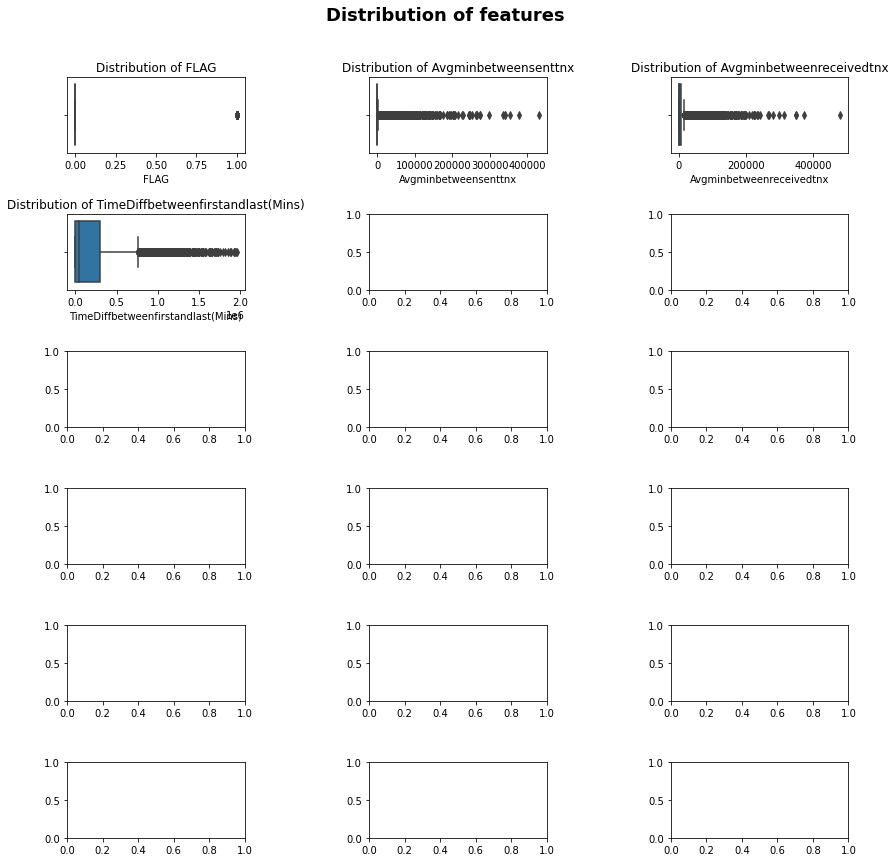

In [241]:
# Investigate the distribution of our features using boxplots
b=20

fig, axes = plt.subplots(6, 3, figsize=(14, 14), constrained_layout =True)
plt.subplots_adjust(wspace = 0.7, hspace=0.8)
plt.suptitle("Distribution of features",y=0.95, size=18, weight='bold')

ax = sns.boxplot(ax = axes[0,0], data=dataset, x=columns[1])
ax.set_title(f'Distribution of {columns[1]}')

ax1 = sns.boxplot(ax = axes[0,1], data=dataset, x=columns[2])
ax1.set_title(f'Distribution of {columns[2]}')

ax2 = sns.boxplot(ax = axes[0,2], data=dataset, x=columns[3])
ax2.set_title(f'Distribution of {columns[3]}')

ax3 = sns.boxplot(ax = axes[1,0], data=dataset, x=columns[4])
ax3.set_title(f'Distribution of {columns[4]}')

The dataset is heavily imbalanced with only 22% of fraudulent instance.

In [81]:
# scale the data on same range
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


In [82]:
#split the data train set and test set (80:30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape)


Number transactions X_train dataset:  (213, 19)
Number transactions y_train dataset:  (213,)
Number transactions X_test dataset:  (92, 19)
Number transactions y_test dataset:  (92,)


In [83]:
# function of evalution metrices
def evaluation_score (y_test,y_pred):
    print("Acuracy : ", accuracy_score(y_test,y_pred))
    print("Recall : ",recall_score(y_test, y_pred))
    print("Precision : ",precision_score(y_test, y_pred))
    print("F1 Score : ",f1_score(y_test, y_pred))
    print("auc_roc score : ",roc_auc_score(y_test,y_pred))
    print("Classification Report :\n", classification_report(y_test,y_pred))
    
    print("Confusion Matrix :\n")
    cm = confusion_matrix(y_test,y_pred) 
    sns.heatmap(cm,annot=True)
    


In [84]:
#function of cross-validation
def cross_validation(model,X_train,y_train,n):
    kfold = KFold(n_splits=10)  
    accuracies = cross_val_score(model,X= X_train,y= y_train,cv = kfold,scoring='accuracy')
    print("Standard Deviation",accuracies.std())
    print("Mean/Average Score",accuracies.mean())

Logestic Regression Classifier :

In [85]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)
    

Model Name: Logestic Classifier

Acuracy :  0.9456521739130435
Recall :  0.8333333333333334
Precision :  0.5555555555555556
F1 Score :  0.6666666666666667
auc_roc score :  0.8934108527131784
Classification Report :
               precision    recall  f1-score   support

           0       0.99      0.95      0.97        86
           1       0.56      0.83      0.67         6

    accuracy                           0.95        92
   macro avg       0.77      0.89      0.82        92
weighted avg       0.96      0.95      0.95        92

Confusion Matrix :



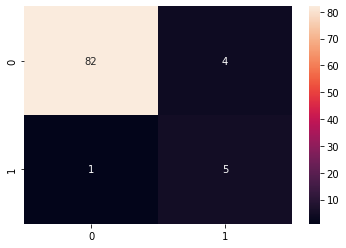

In [107]:
print("Model Name: Logestic Classifier\n")
evaluation_score(y_test,y_pred)

In [108]:
cross_validation(lr_model,X_train,y_train,10)

Standard Deviation 0.08621160766438393
Mean/Average Score 0.8772727272727272


In [109]:
# Handling Imbalance data for better performance : Using oversampling technique : SMOTE
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Fit 
sm = SMOTE(random_state = 2,sampling_strategy=1) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())          # ravel() --> all class disply

print("------------------------------------------------------------")
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))



Before OverSampling, counts of label '1': 38
Before OverSampling, counts of label '0': 175 

------------------------------------------------------------
After OverSampling, counts of label '1': 175
After OverSampling, counts of label '0': 175


Model Name: Logestic Classifier on balanced data

Acuracy :  0.8152173913043478
Recall :  0.8333333333333334
Precision :  0.23809523809523808
F1 Score :  0.37037037037037035
auc_roc score :  0.8236434108527133
Classification Report :
               precision    recall  f1-score   support

           0       0.99      0.81      0.89        86
           1       0.24      0.83      0.37         6

    accuracy                           0.82        92
   macro avg       0.61      0.82      0.63        92
weighted avg       0.94      0.82      0.86        92

Confusion Matrix :



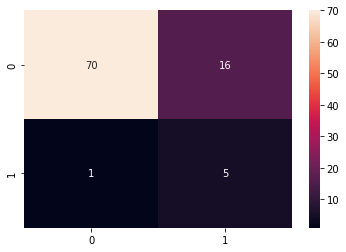

In [111]:
# after handling imbalaced data to check evalation of LR model :
lr_model = LogisticRegression()
lr_model.fit(X_train_res,y_train_res.ravel())
y_pred_res = lr_model.predict(X_test)


print("Model Name: Logestic Classifier on balanced data\n")

evaluation_score(y_test,y_pred_res)

In [112]:
cross_validation(lr_model,X_train_res,y_train_res.ravel(),10)

Standard Deviation 0.05150787536377125
Mean/Average Score 0.8428571428571429


Random Forest Classifier :

In [113]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators= 150,max_depth=100)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)

Model Name: Random Forest Classifier

Acuracy :  0.9347826086956522
Recall :  0.8333333333333334
Precision :  0.5
F1 Score :  0.625
auc_roc score :  0.8875968992248063
Classification Report :
               precision    recall  f1-score   support

           0       0.99      0.94      0.96        86
           1       0.50      0.83      0.62         6

    accuracy                           0.93        92
   macro avg       0.74      0.89      0.79        92
weighted avg       0.96      0.93      0.94        92

Confusion Matrix :



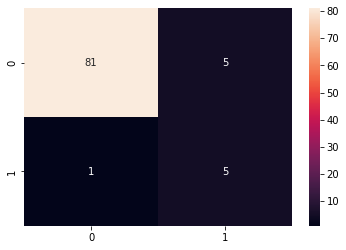

In [114]:
print("Model Name: Random Forest Classifier\n")

evaluation_score(y_test, y_pred)

In [115]:
cross_validation(rf_model,X_train,y_train,10)

Standard Deviation 0.04947391001672596
Mean/Average Score 0.9012987012987013


In [116]:
# Have our class balanced, Time to apply our model with our new data :
def train_model(n,max_d):
    rf_model =RandomForestClassifier(n_estimators=n,  
     max_depth=max_d)
    rf_model.fit(X_train_res,y_train_res.ravel())
    predictions = rf_model.predict(X_test)
    return predictions
def show_predictions(data):
    results = rf_model.predict(data)
    return results 
    
    
train_model_predictions = train_model(500,100)


Model Name: Random Forest

Acuracy :  0.9456521739130435
Recall :  1.0
Precision :  0.5454545454545454
F1 Score :  0.7058823529411764
auc_roc score :  0.9709302325581396
Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        86
           1       0.55      1.00      0.71         6

    accuracy                           0.95        92
   macro avg       0.77      0.97      0.84        92
weighted avg       0.97      0.95      0.95        92

Confusion Matrix :



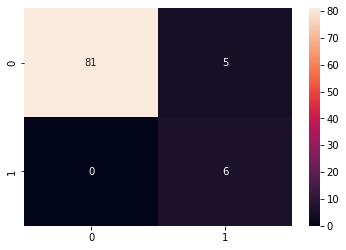

In [118]:
print("Model Name: Random Forest\n")
evaluation_score(y_test, train_model_predictions)

In [119]:
cross_validation(rf_model,X_train,y_train,10)

Standard Deviation 0.06400817550994145
Mean/Average Score 0.9201298701298702


>lr 0.899 (0.050)
>knn 0.890 (0.050)
>svm 0.856 (0.025)
>random_forest 0.917 (0.046)
>bayes 0.396 (0.072)


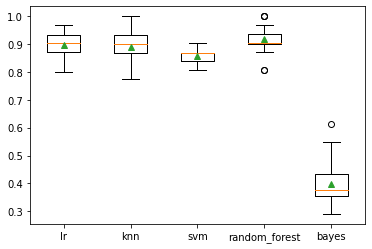

In [124]:
#Select the best model----------------------------------------
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['svm'] = SVC()
    models['random_forest'] = RandomForestClassifier()
    models['bayes'] = GaussianNB()
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
         cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
         scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
         return scores
    
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
                 scores = evaluate_model(model, X, y)
                 results.append(scores)
                 names.append(name)
                 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [121]:
#GridSeachCV -----
from sklearn.model_selection import GridSearchCV
p = [{'n_estimators':[50,100,150],'max_depth':[10, 100]}]
grid_search = GridSearchCV(estimator = rf_model,param_grid= p, scoring = "accuracy",cv=10,n_jobs=-1)
grid_search = grid_search.fit(X_train,y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("best accuracy , best_paramters", best_accuracy, best_parameters)

best accuracy , best_paramters 0.9296536796536797 {'max_depth': 10, 'n_estimators': 100}


Acuracy :  0.9347826086956522
Recall :  1.0
Precision :  0.5
F1 Score :  0.6666666666666666
auc_roc score :  0.9651162790697674
Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        86
           1       0.50      1.00      0.67         6

    accuracy                           0.93        92
   macro avg       0.75      0.97      0.82        92
weighted avg       0.97      0.93      0.94        92

Confusion Matrix :

Standard Deviation 0.057006593402080544
Mean/Average Score 0.9294372294372295


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

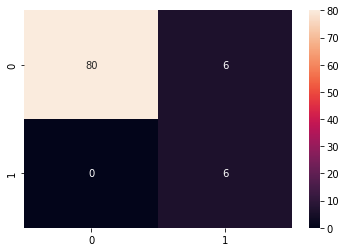

In [122]:
train_model_predictions_1 =train_model(100,10)
#Accuracy Score
evaluation_score(y_test, train_model_predictions_1)
cross_validation(rf_model,X_train,y_train,10)

show_predictions(X_test)